In [84]:
from prody import *

from pylab import *

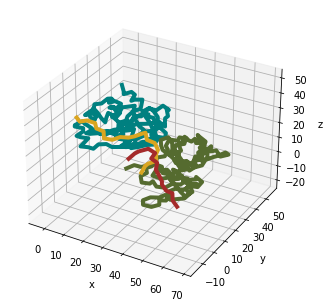

In [85]:
protein = parsePDB('minimized.pdb')

showProtein(protein);

In [86]:
protein_ca = protein.ca

protein_anm = ANM('protein ca')

protein_anm.buildHessian(protein_ca)
    
protein_anm.calcModes(n_modes=3)    

In [87]:
 writeNMD('protein_anm.nmd', protein_anm, protein_ca)

'protein_anm.nmd'

In [88]:
protein_anm_ext, protein_all = extendModel(protein_anm, protein_ca, protein, norm=True)

In [89]:
saveAtoms(protein)

saveModel(protein_anm)

saveModel(protein_anm_ext, 'protein_ext')

'protein_ext.nma.npz'

In [90]:
protein = loadAtoms('minimized.ag.npz')

protein_anm = loadModel('protein_ca.anm.npz')

protein_anm_ext = loadModel('protein_ext.nma.npz')

In [91]:
ens = sampleModes(protein_anm_ext, atoms=protein.protein, n_confs=40, rmsd=1.0)

writeDCD('proteinall.dcd', ens)

@> Writing DCD [ 97%] 1s

'proteinall.dcd'

In [92]:
!mkdir -p protein_ensemble

protein.addCoordset(ens.getCoordsets())

protein.all.setBetas(0)

protein.ca.setBetas(1)

In [94]:
import os

for i in range(1, protein.numCoordsets()):  # skipping 0th coordinate set
    fn = os.path.join('protein_ensemble', 'protein_' + str(i) + '.pdb')
    writePDB(fn, protein, csets=i)